# Experiment 04:正则化回归

目的：对比普通多项式回归和两种正则化

目标函数：f(x) = x^2 + 5 sin(x) + noise ,  x ∈ [-5, 5]

In [291]:
import numpy as np
import matplotlib.pyplot as plt
##pyplot是matplotlib库中的一个模块，主要用于绘制各种静态、动态和交互式的图表。

from sklearn.preprocessing import PolynomialFeatures
##PolynomialFeatures用于生成多项式特征,之所以不用numpy.polyfit是因为它只能拟合多项式，
##而PolynomialFeatures可以生成多项式特征，适用于各种回归模型。
##多项式特征是指通过对原始特征进行多项式变换，生成新的特征，以捕捉数据中的非线性关系。
from sklearn.linear_model import LinearRegression, Ridge, Lasso
##linearRegression是线性回归模型，Ridge是岭回归模型，Lasso是套索回归模型
from sklearn.metrics import mean_squared_error
##mean_squared_error用于计算均方误差

In [292]:
np.random.seed(0)

In [293]:
x=np.linspace(-5,5,15)##linspace用于生成等间距的数值序列
noise=np.random.normal(0,5,x.shape)##生成均值为0，标准差为5的正态分布噪声
y_true=x**2+5*np.sin(x)
y=y_true+noise
x

array([-5.        , -4.28571429, -3.57142857, -2.85714286, -2.14285714,
       -1.42857143, -0.71428571,  0.        ,  0.71428571,  1.42857143,
        2.14285714,  2.85714286,  3.57142857,  4.28571429,  5.        ])

In [294]:
X=x.reshape(-1,1)
##reshape用于改变数组的形状，这里将一维数组x转换为二维数组X
##-1表示自动计算行数，1表示每行一个元素,即将x转换为20行1列的二维数组
X

array([[-5.        ],
       [-4.28571429],
       [-3.57142857],
       [-2.85714286],
       [-2.14285714],
       [-1.42857143],
       [-0.71428571],
       [ 0.        ],
       [ 0.71428571],
       [ 1.42857143],
       [ 2.14285714],
       [ 2.85714286],
       [ 3.57142857],
       [ 4.28571429],
       [ 5.        ]])

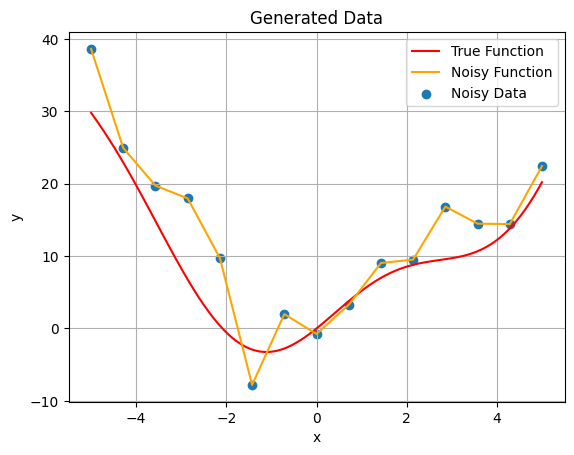

In [295]:
x_draw=np.linspace(-5,5,300)##用于绘制平滑曲线
y_draw_true=x_draw**2+5*np.sin(x_draw)
plt.plot(x_draw,y_draw_true,color='red',label='True Function')##绘制真实函数

plt.plot(x,y,color='orange',label='Noisy Function')##真实数据点
plt.scatter(x,y,label='Noisy Data')##散点图
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Generated Data')
plt.legend()
plt.show()

In [296]:
poly=PolynomialFeatures(degree=9)##表示生成9次多项式特征
x_poly=poly.fit_transform(X)##用于生成多项式特征矩阵，来让模型拟合非线性数据
x_poly

array([[ 1.00000000e+00, -5.00000000e+00,  2.50000000e+01,
        -1.25000000e+02,  6.25000000e+02, -3.12500000e+03,
         1.56250000e+04, -7.81250000e+04,  3.90625000e+05,
        -1.95312500e+06],
       [ 1.00000000e+00, -4.28571429e+00,  1.83673469e+01,
        -7.87172012e+01,  3.37359434e+02, -1.44582614e+03,
         6.19639776e+03, -2.65559904e+04,  1.13811387e+05,
        -4.87763089e+05],
       [ 1.00000000e+00, -3.57142857e+00,  1.27551020e+01,
        -4.55539359e+01,  1.62692628e+02, -5.81045100e+02,
         2.07516107e+03, -7.41128954e+03,  2.64688912e+04,
        -9.45317544e+04],
       [ 1.00000000e+00, -2.85714286e+00,  8.16326531e+00,
        -2.33236152e+01,  6.66389005e+01, -1.90396858e+02,
         5.43991024e+02, -1.55426007e+03,  4.44074305e+03,
        -1.26878373e+04],
       [ 1.00000000e+00, -2.14285714e+00,  4.59183673e+00,
        -9.83965015e+00,  2.10849646e+01, -4.51820670e+01,
         9.68187150e+01, -2.07468675e+02,  4.44575732e+02,
        -9.

### 普通多项式回归（过拟合）

In [297]:
model=LinearRegression()
model.fit(x_poly,y)##拟合模型

x_draw_reshaped=x_draw.reshape(-1,1)##将绘图用的x_draw转换为二维数组
x_draw_poly=poly.transform(x_draw_reshaped)##生成绘图用的多项式特征
y_draw_pred=model.predict(x_draw_poly)##y_draw_pred是模型预测的y值

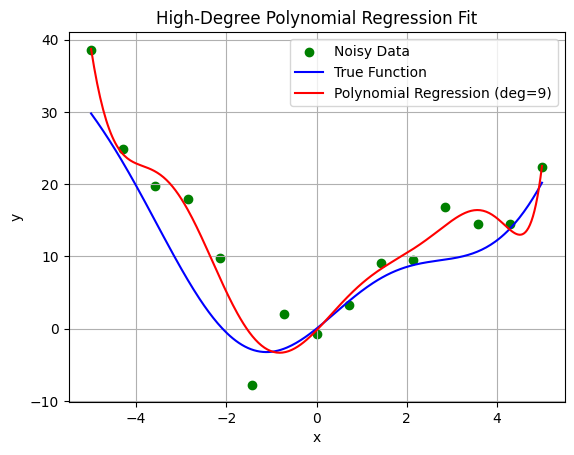

In [298]:
plt.scatter(x,y,color='green',label='Noisy Data')
plt.plot(x_draw,y_draw_true,color='blue',label='True Function')
plt.plot(x_draw,y_draw_pred,color='red',label='Polynomial Regression (deg=9)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('High-Degree Polynomial Regression Fit')
plt.legend()
plt.grid()
plt.show()

### Ridge回归（L2正则）

In [299]:
ridge=Ridge(alpha=10)##alpha是正则化强度参数,值越大正则化越强
##Ridge回归通过在损失函数中添加L2正则化项来惩罚模型的复杂度，从而减少过拟合现象。
ridge.fit(x_poly,y)##x_poly是多项式特征矩阵
y_ridge_pred=ridge.predict(x_draw_poly)##y_ridge_pred是岭回归模型预测的y值

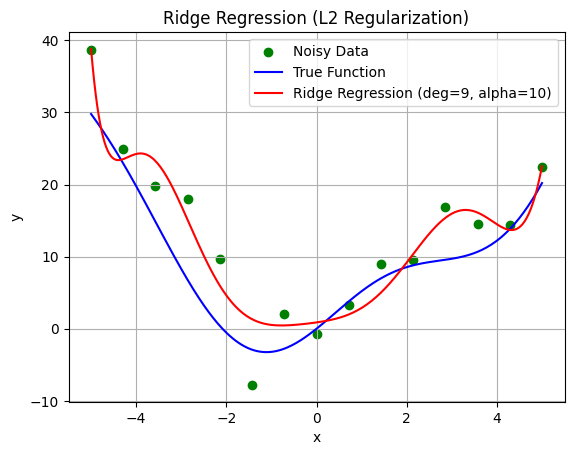

In [300]:
plt.scatter(x,y,color='green',label='Noisy Data') 
plt.plot(x_draw,y_draw_true,color='blue',label='True Function')
plt.plot(x_draw,y_ridge_pred,color='red',label='Ridge Regression (deg=9, alpha=10)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression (L2 Regularization)')  
plt.legend()
plt.grid()
plt.show()

### Lasso回归（L1正则）

In [301]:
lasso=Lasso(alpha=0.1,max_iter=10000)##max_iter是最大迭代次数
lasso.fit(x_poly,y)##用同样的多项式特征矩阵拟合模型

y_lasso=lasso.predict(x_draw_poly)##y_lasso是套索回归模型预测的y值

d:\anaconda3\envs\test02\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.616e+01, tolerance: 1.852e-01
  model = cd_fast.enet_coordinate_descent(


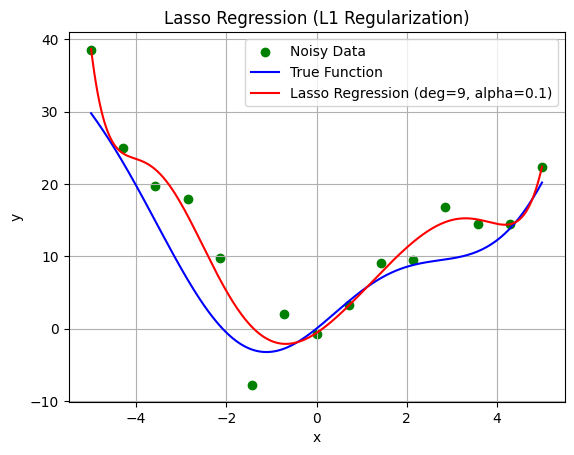

In [302]:
plt.scatter(x,y,color='green',label='Noisy Data')
plt.plot(x_draw,y_draw_true,color='blue',label='True Function')
plt.plot(x_draw,y_lasso,color='red',label='Lasso Regression (deg=9, alpha=0.1)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lasso Regression (L1 Regularization)')
plt.legend()
plt.grid()
plt.show()

In [303]:
def mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

print("Linear Regression MSE:",
      mse(y, model.predict(x_poly)))

print("Ridge Regression MSE:",
      mse(y, ridge.predict(x_poly)))

print("Lasso Regression MSE:",
      mse(y, lasso.predict(x_poly)))

Linear Regression MSE: 6.910610561743824
Ridge Regression MSE: 9.930787695099331
Lasso Regression MSE: 7.5343191208215705


## 结论

在训练集上，普通最小二乘回归取得最低的 MSE，而 Ridge 与 Lasso 由于引入正则项，对模型复杂度进行了约束，导致训练误差有所上升,这一现象符合正则化方法的理论预期。后续实验里将对三者的模型泛化能力进行分析，分析正则模型在抑制过拟合方面的优势。